In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\princ\Downloads\ODI Cricket Data new.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   player_name               1540 non-null   object
 1   role                      1540 non-null   object
 2   total_runs                1540 non-null   int64 
 3   strike_rate               1540 non-null   object
 4   total_balls_faced         1540 non-null   int64 
 5   total_wickets_taken       1540 non-null   int64 
 6   total_runs_conceded       1540 non-null   int64 
 7   total_overs_bowled        1540 non-null   int64 
 8   total_matches_played      1540 non-null   int64 
 9   matches_played_as_batter  1540 non-null   int64 
 10  matches_played_as_bowler  1540 non-null   int64 
 11  matches_won               1540 non-null   int64 
 12  matches_lost              1540 non-null   int64 
 13  player_of_match_awards    1540 non-null   int64 
 14  team                    

In [4]:
def clean_and_convert(col):
    """Cleans string columns by removing non-numeric characters and converts to float"""
    try:
        new_col = col.astype(str).str.replace(r'[^\d\.]', '', regex=True).astype(float)
        return new_col
    except ValueError:
        return col

cols_to_convert = ['strike_rate','percentage']

for col in cols_to_convert:
    df[col] = clean_and_convert(df[col])

In [5]:
# Fill missing values (if any) with 0
df = df.fillna(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player_name               1540 non-null   object 
 1   role                      1540 non-null   object 
 2   total_runs                1540 non-null   int64  
 3   strike_rate               1540 non-null   object 
 4   total_balls_faced         1540 non-null   int64  
 5   total_wickets_taken       1540 non-null   int64  
 6   total_runs_conceded       1540 non-null   int64  
 7   total_overs_bowled        1540 non-null   int64  
 8   total_matches_played      1540 non-null   int64  
 9   matches_played_as_batter  1540 non-null   int64  
 10  matches_played_as_bowler  1540 non-null   int64  
 11  matches_won               1540 non-null   int64  
 12  matches_lost              1540 non-null   int64  
 13  player_of_match_awards    1540 non-null   int64  
 14  team    

In [7]:
print(df.head())

      player_name    role  total_runs            strike_rate  \
0         V Kohli  Batter       13784  9.170.381.212.161.530   
1   KC Sangakkara  Batter       11618  7.939.046.057.127.230   
2       RG Sharma  Batter       10646  9.035.817.348.497.700   
3        MS Dhoni  Batter       10274  8.497.932.175.351.530   
4  AB de Villiers  Batter        9435  9.944.139.966.273.180   

   total_balls_faced  total_wickets_taken  total_runs_conceded  \
0              15031                    7                  681   
1              14634                    0                    0   
2              11782                   11                  538   
3              12090                    1                   32   
4               9488                    7                  205   

   total_overs_bowled  total_matches_played  matches_played_as_batter  \
0                 671                   579                       579   
1                   0                   510                       510   

In [8]:
# Calculated Columns (Equivalent to DAX in Power BI)
df['BattingAverage'] = df['total_runs'] / (df['matches_played_as_batter'] + 1e-9)  # Avoid division by zero
df['BowlingAverage'] = df['total_runs_conceded'] / (df['total_wickets_taken'] + 1e-9) # Avoid division by zero
df['WinPercentage'] = df['matches_won'] / (df['total_matches_played'] + 1e-9)
df['LossPercentage'] = df['matches_lost'] / (df['total_matches_played'] + 1e-9)
df['RunsPerMatch'] = df['total_runs'] / (df['total_matches_played'] + 1e-9)
df['WicketsPerMatch'] = df['total_wickets_taken'] / (df['total_matches_played'] + 1e-9)

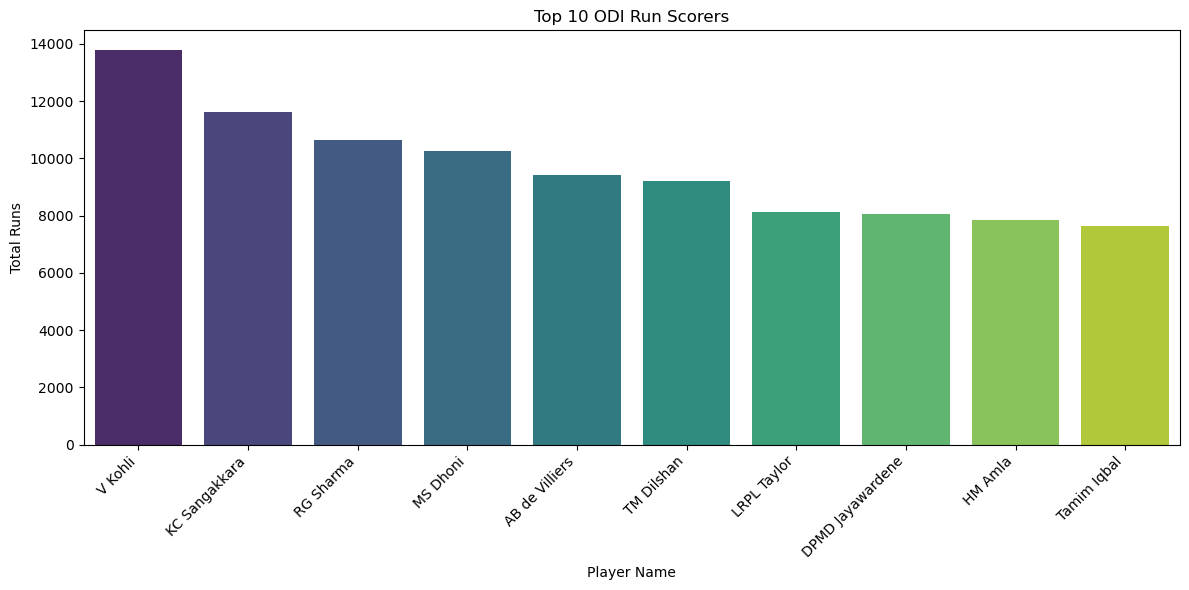

In [21]:
# 1. Top 10 Run Scorers
top_run_scorers = df.sort_values(by='total_runs', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='player_name', y='total_runs', data=top_run_scorers, palette='viridis', hue='player_name', legend=False)
plt.title('Top 10 ODI Run Scorers')
plt.xlabel('Player Name')
plt.ylabel('Total Runs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

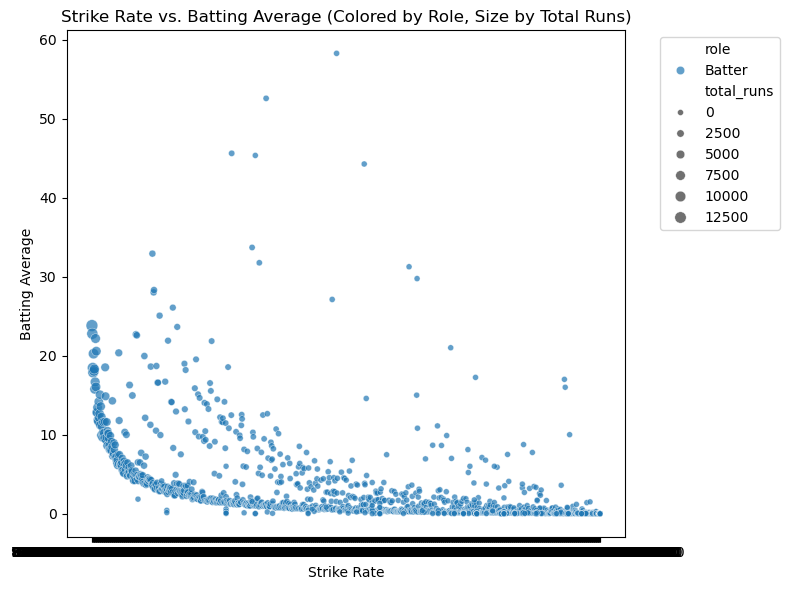

In [10]:
# 2. Strike Rate vs. Batting Average
plt.figure(figsize=(8, 6))
sns.scatterplot(x='strike_rate', y='BattingAverage', data=df, hue='role', size='total_runs', alpha=0.7)
plt.title('Strike Rate vs. Batting Average (Colored by Role, Size by Total Runs)')
plt.xlabel('Strike Rate')
plt.ylabel('Batting Average')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

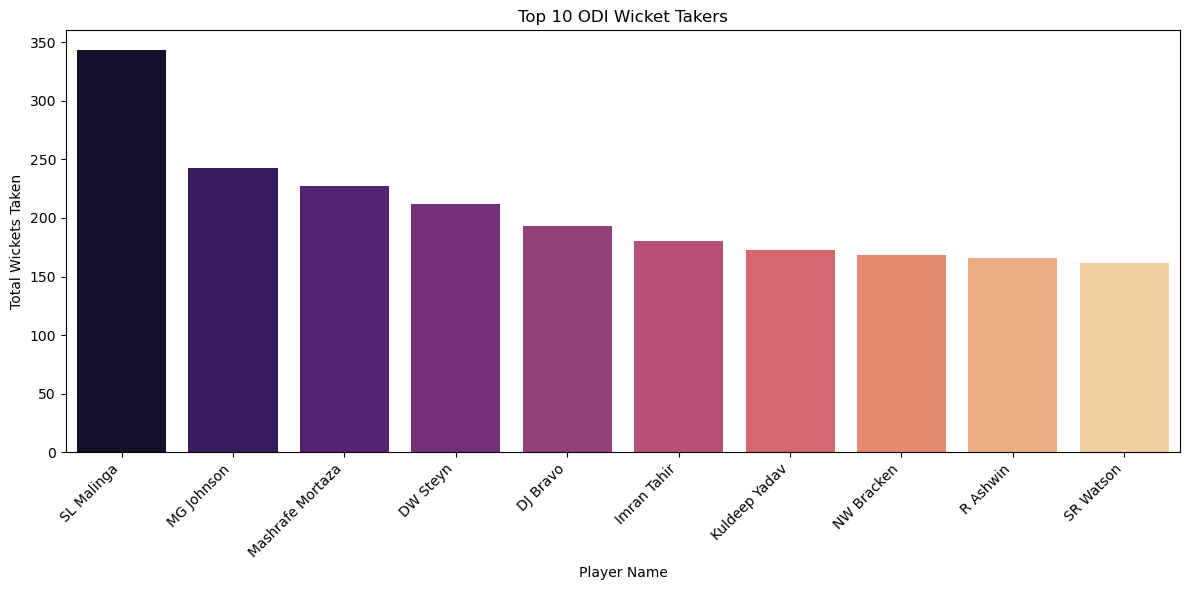

In [19]:
# 3. Top 10 Wicket Takers
top_wicket_takers = df.sort_values(by='total_wickets_taken', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='player_name', y='total_wickets_taken', data=top_wicket_takers, palette='magma', hue='player_name', legend=False)
plt.title('Top 10 ODI Wicket Takers')
plt.xlabel('Player Name')
plt.ylabel('Total Wickets Taken')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

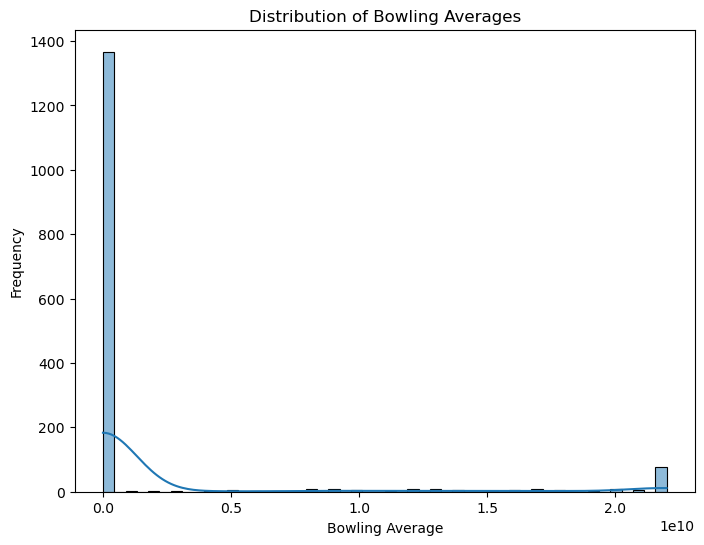

In [12]:
# 4. Bowling Average Distribution
min_threshold = df['BowlingAverage'].quantile(0.05)  # 5th percentile
max_threshold = df['BowlingAverage'].quantile(0.95)  # 95th percentile
df['BowlingAverage_Clipped'] = df['BowlingAverage'].clip(lower=min_threshold, upper=max_threshold)
plt.figure(figsize=(8, 6))
sns.histplot(df['BowlingAverage_Clipped'], kde=True, bins=50)
plt.title('Distribution of Bowling Averages')
plt.xlabel('Bowling Average')
plt.ylabel('Frequency')
plt.show()

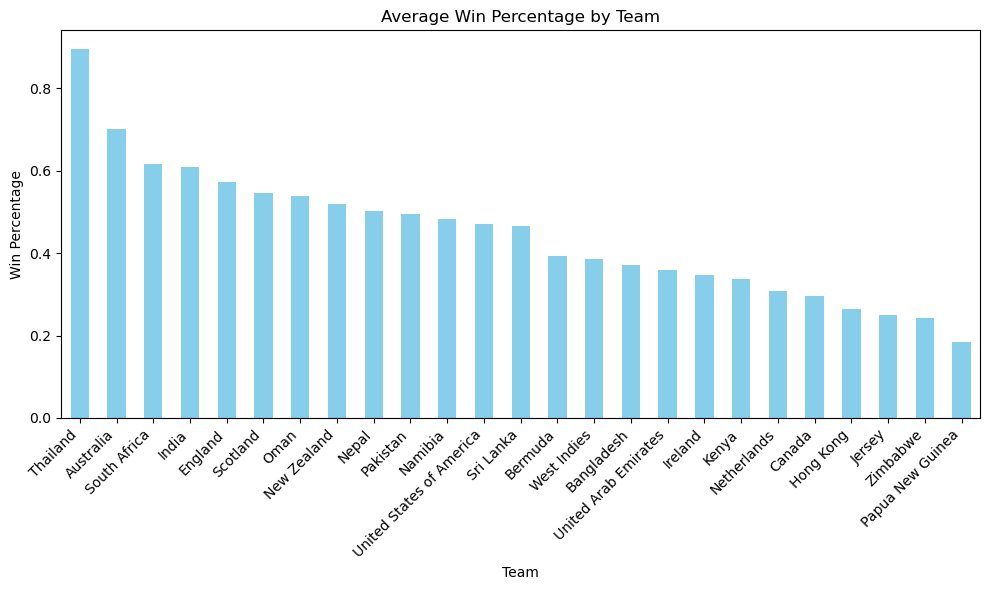

In [13]:
# 5. Win Percentage by Team
team_win_percentage = df.groupby('team')['WinPercentage'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
team_win_percentage.plot(kind='bar', color='skyblue')
plt.title('Average Win Percentage by Team')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

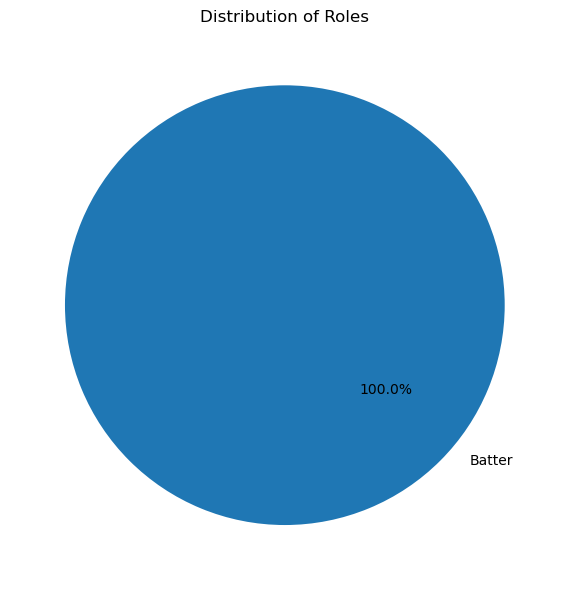

In [14]:
# 6. Role Counts
role_counts = df['role'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(role_counts, labels=role_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Roles')
plt.tight_layout()
plt.show()

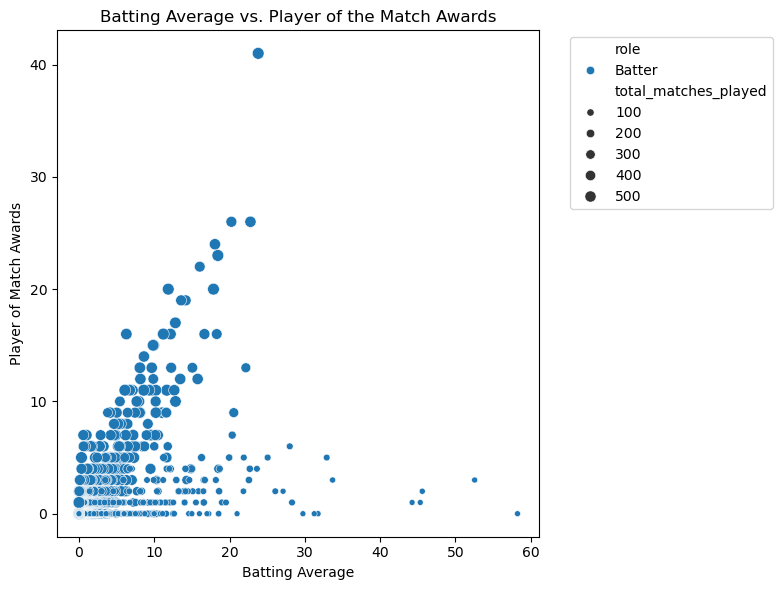

In [15]:
# 7. Player of Match awards vs other metrics
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BattingAverage', y='player_of_match_awards', data=df, size='total_matches_played', hue='role')
plt.title('Batting Average vs. Player of the Match Awards')
plt.xlabel('Batting Average')
plt.ylabel('Player of Match Awards')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

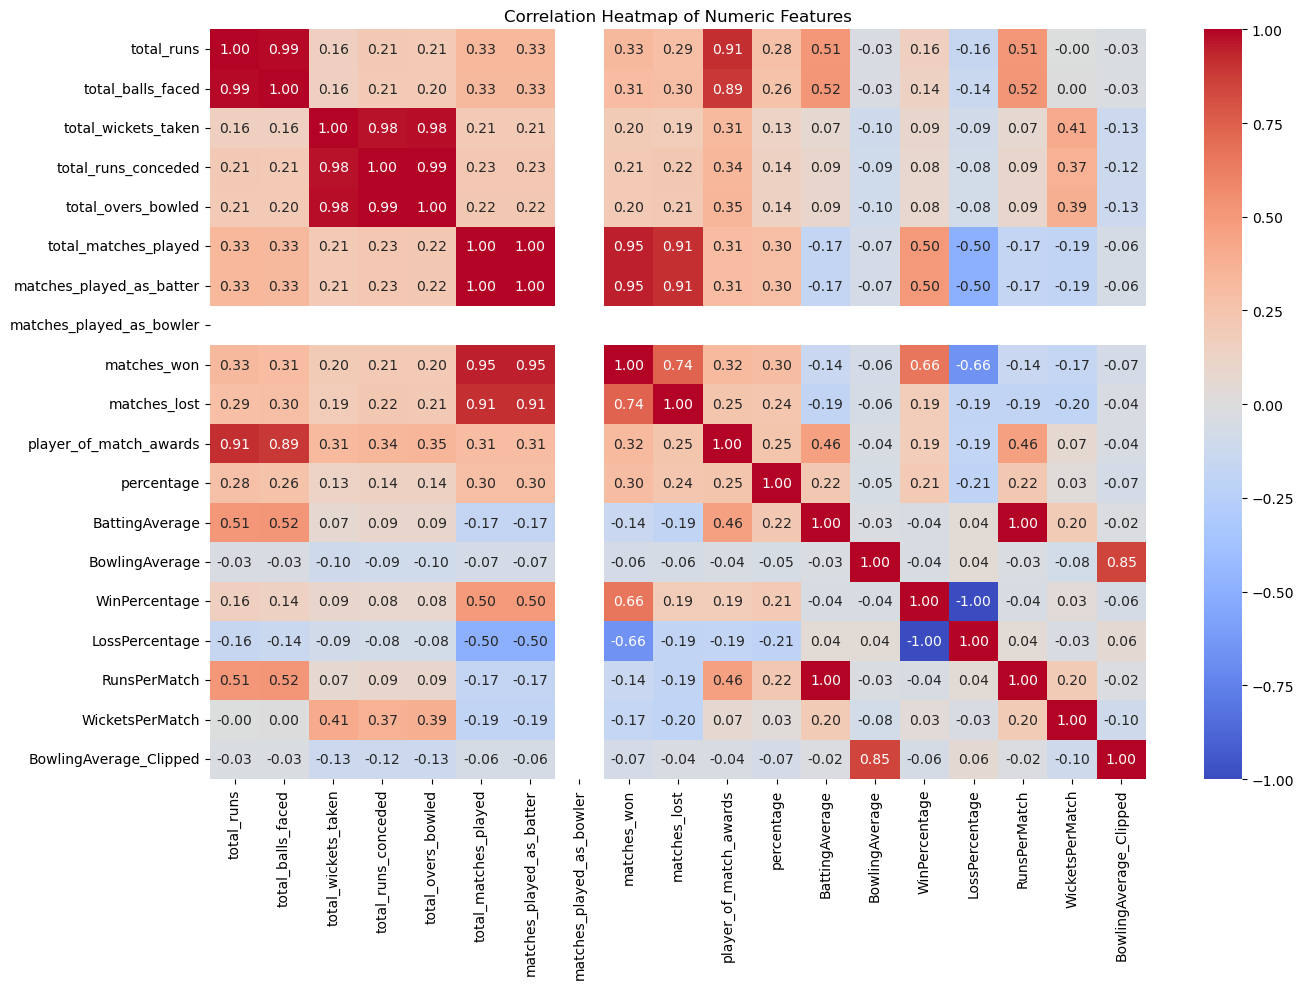

In [16]:
# 8. Correlation Heatmap (Numeric Columns)
numeric_df = df.select_dtypes(include=np.number)  # Select only numeric columns
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

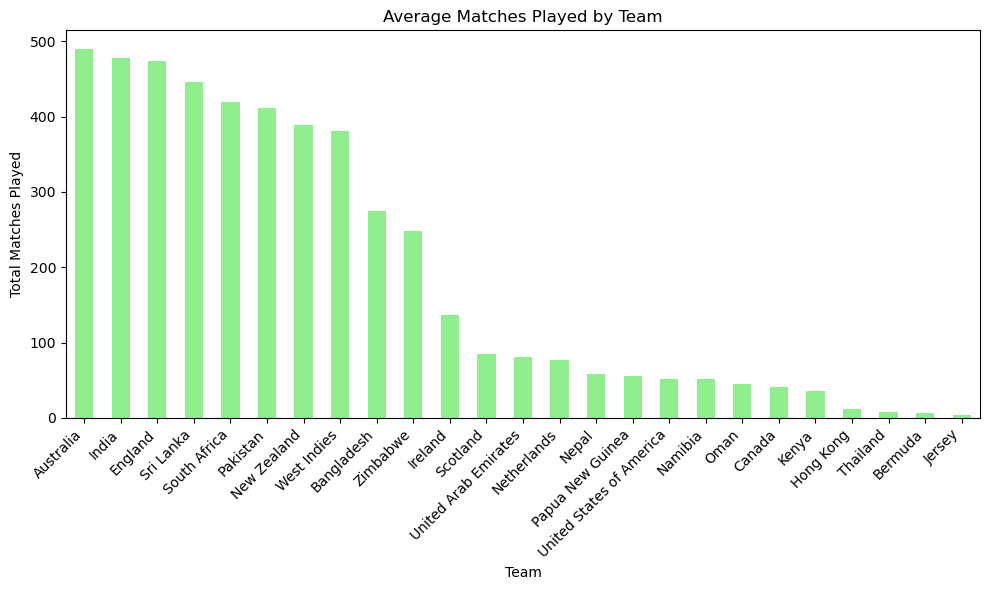

In [17]:
# 9. Most Matches Played by Country
team_matches = df.groupby('team')['total_matches_played'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
team_matches.plot(kind='bar', color='lightgreen')
plt.title('Average Matches Played by Team')
plt.xlabel('Team')
plt.ylabel('Total Matches Played')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()